In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/nisha/Downloads/Machine Learning/Project/Data/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

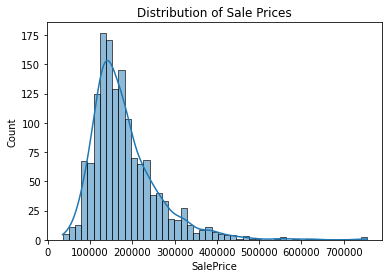

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

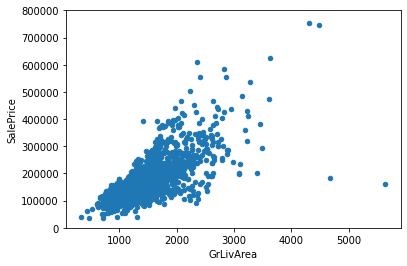

In [8]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* 'SalePrice' and 'GrLivArea' show a linear relationship

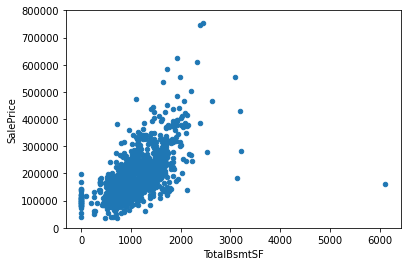

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 'SalePrice' and 'TotalBsmtSF' also show a linear relationship

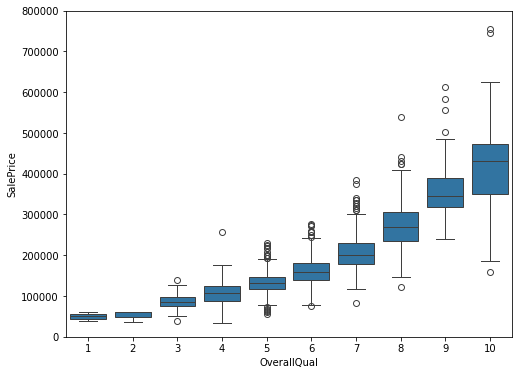

In [10]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

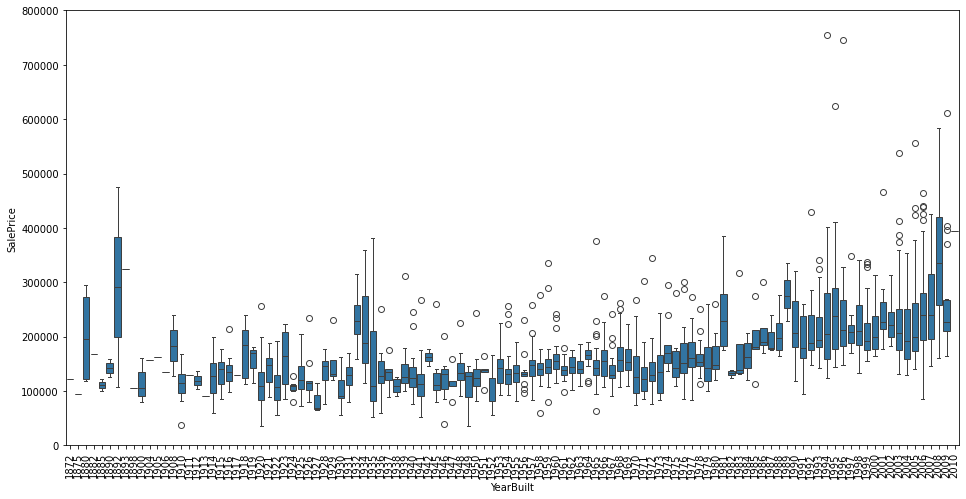

In [11]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

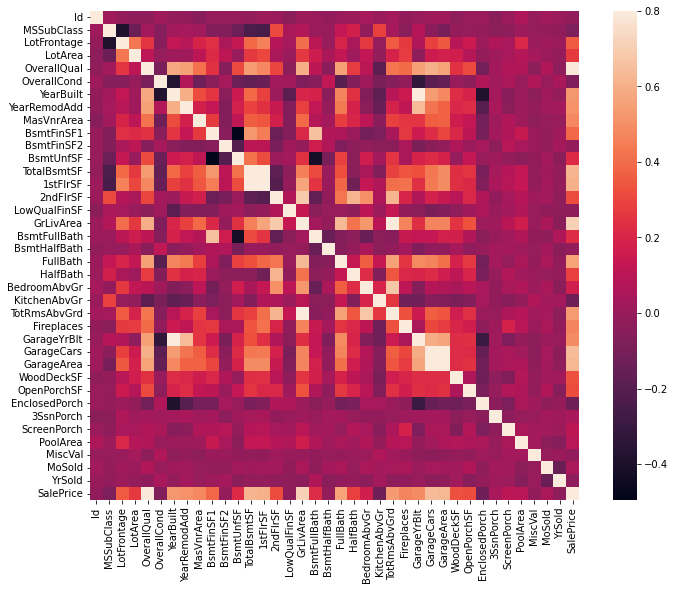

In [13]:
# Compute correlation matrix
corrmat = numeric_df.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

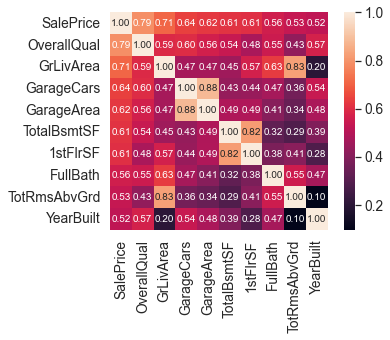

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

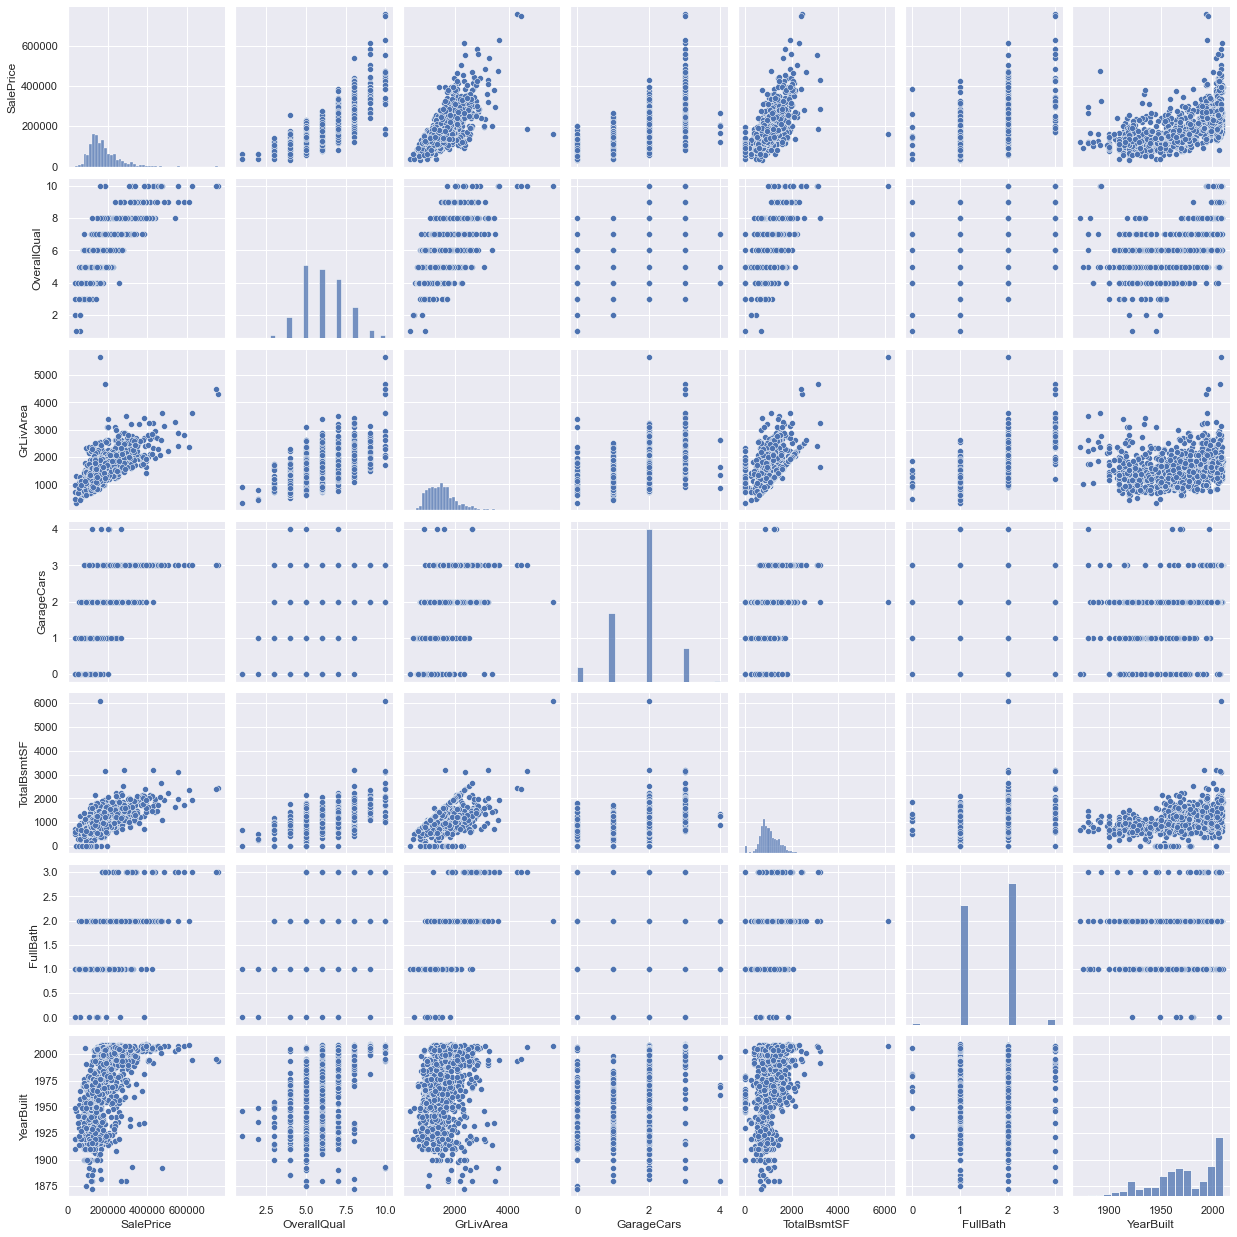

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

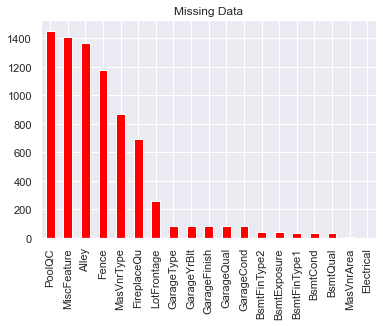

In [16]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color="red")
plt.title('Missing Data');

In [17]:
y = df['SalePrice']
df = df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley','Fence','SalePrice'],axis=1)

In [18]:
numerical_col = [col for col in df.columns if df[col].dtype in ['float64','int64']]
categorical_col = [col for col in df.columns if df[col].dtype not in ['float64','int64']]

In [19]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [21]:
df[numerical_col] = SimpleImputer().fit_transform(df[numerical_col])

df[numerical_col] = MinMaxScaler().fit_transform(df[numerical_col])

In [22]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,WD,Normal
1456,0.000000,RL,0.219178,0.055505,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,WD,Normal
1457,0.294118,RL,0.154110,0.036187,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,WD,Normal
1458,0.000000,RL,0.160959,0.039342,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,WD,Normal


In [23]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond',
                'MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','KitchenQual','Exterior1st','SaleType']
df[columns_None] = df[columns_None].fillna('none')

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_col])  # Updated parameter
encoded_col = list(encoder.get_feature_names_out(categorical_col))  # Updated method

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoder.transform(df[categorical_col]), columns=encoded_col)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally drop the original categorical columns if no longer needed
df.drop(columns=categorical_col, inplace=True)

In [26]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 401157263.313242
  RMSE: 20028.910687135285
  MAE: 13025.576255707763
Test:
  MSE: 1.1269435512413289e+30
  RMSE: 1061575975256283.2
  MAE: 113274742344495.33


In [31]:
from sklearn.svm import SVR

In [32]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [33]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 6345408353.488727
  RMSE: 79658.07148989188
  MAE: 54962.555400500365
Test:
  MSE: 7183269745.195775
  RMSE: 84754.17243531893
  MAE: 57181.62164909739


In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
model = ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 2026557623.7757287
  RMSE: 45017.3036040113
  MAE: 28562.891615870947
Test:
  MSE: 2451658870.23348
  RMSE: 49514.22896737341
  MAE: 30173.09202370486


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 128215791.46963242
  RMSE: 11323.241208666024
  MAE: 6678.081707762558
Test:
  MSE: 729199815.2975597
  RMSE: 27003.700029765547
  MAE: 16791.449835616437


_______________________________________________________________________________________________________________________________

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 401157263.313242
  RMSE: 20028.910687135285
  MAE: 13025.576255707763
Test:
  MSE: 1.1269435512413289e+30
  RMSE: 1061575975256283.2
  MAE: 113274742344495.33


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [52]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 136052175.9358923
  RMSE: 11664.14059997102
  MAE: 6706.59290410959
Test:
  MSE: 721749126.5910631
  RMSE: 26865.389008742513
  MAE: 16576.192356164385


In [46]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_elastic_net = grid.best_estimator_

In [53]:
model = ElasticNet()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 2026557623.7757287
  RMSE: 45017.3036040113
  MAE: 28562.891615870947
Test:
  MSE: 2451658870.23348
  RMSE: 49514.22896737341
  MAE: 30173.09202370486


In [47]:
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_svr = grid.best_estimator_

print("Best Parameters for SVR:", grid.best_params_)


Best Parameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


In [54]:
model = SVR()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 6345408353.488727
  RMSE: 79658.07148989188
  MAE: 54962.555400500365
Test:
  MSE: 7183269745.195775
  RMSE: 84754.17243531893
  MAE: 57181.62164909739


In [48]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_xgboost = grid.best_estimator_

print("Best Parameters for XGBoost:", grid.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [55]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 1403937.575787855
  RMSE: 1184.8787177546296
  MAE: 840.7478310502283
Test:
  MSE: 684600632.6974919
  RMSE: 26164.87402410896
  MAE: 17069.036194349315


In [49]:
from sklearn.linear_model import SGDRegressor

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 5000]
}
grid = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_sgd = grid.best_estimator_
print("Best Parameters for SGDRegressor:", grid.best_params_)


Best Parameters for SGDRegressor: {'alpha': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet'}


In [56]:
model = SGDRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 677197364.0552849
  RMSE: 26023.016044557266
  MAE: 16247.136008573592
Test:
  MSE: 966123652.0080936
  RMSE: 31082.529691260548
  MAE: 20326.886066973082


In [50]:
from sklearn.linear_model import Ridge

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_ridge = grid.best_estimator_
print("Best Parameters for Ridge:", grid.best_params_)


Best Parameters for Ridge: {'alpha': 10.0}


In [57]:
model = Ridge()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 505826242.5230536
  RMSE: 22490.58119575956
  MAE: 14486.351497773016
Test:
  MSE: 817593560.9476739
  RMSE: 28593.593005211394
  MAE: 18910.492935907645


In [51]:
from sklearn.linear_model import BayesianRidge

param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}
grid = GridSearchCV(BayesianRidge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_bayes_ridge = grid.best_estimator_
print("Best Parameters for BayesianRidge:", grid.best_params_)


Best Parameters for BayesianRidge: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 0.0001}


In [58]:
model = BayesianRidge()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = model.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = model.score(X_test, y_test)

print("Training Data:")
print("  MSE: " +  str(train_mse))
print("  RMSE: " + str(train_rmse))
print("  MAE: " + str(train_mae))

print("Test:")
print("  MSE: " + str(test_mse))
print("  RMSE: " + str(test_rmse))
print("  MAE: " + str(test_mae))

Training Data:
  MSE: 558239001.3652748
  RMSE: 23627.08194774113
  MAE: 14989.719206209758
Test:
  MSE: 865496245.8263803
  RMSE: 29419.317562213782
  MAE: 19380.4139997981
